<a href="https://colab.research.google.com/github/navneetkrc/Colab_fastai/blob/master/Intel_Image_Classification3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Get latest version of fastai using pip.

In [0]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [3]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install torchtext==0.2.3
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 163kB 13.4MB/s 
    100% |████████████████████████████████| 112kB 17.7MB/s 
    100% |████████████████████████████████| 591.8MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x627e4000 @  0x7f93dcdec2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 20.5MB/s 
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for wrapt ... - \ 

In [4]:
import torch
print(torch.__version__)


1.0.0


In [0]:
from fastai import *
from fastai.vision import *
import pandas as pd 

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
#bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

#  Intel Scene Classification Image Dataset

## Looking at the data

###Getting Dataset from Kaggle

In [7]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
!echo '{"username":"navneetkrch","key":"4910f3543e9486158ccfa00ca84b274f"}'> ~/.kaggle/kaggle.json  # Replace
!chmod 600 kaggle.json


chmod: cannot access 'kaggle.json': No such file or directory


In [8]:
!mkdir -p data
!mkdir -p data/test
!kaggle datasets download -d nitishabharathi/scene-classification

 99% 353M/358M [00:08<00:00, 23.2MB/s]
100% 358M/358M [00:08<00:00, 42.9MB/s]


In [9]:
!unzip scene-classification.zip 

Archive:  scene-classification.zip
  inflating: test_WyRytb0.csv        
  inflating: train-scene classification.zip  


In [10]:
!unzip train-scene\ classification.zip -d data/
!mv test_WyRytb0.csv data/test.csv
!mv data/train.csv data/train/labels.csv

Archive:  train-scene classification.zip
   creating: data/train/
  inflating: data/train.csv          
  inflating: data/train/0.jpg        
  inflating: data/train/1.jpg        
  inflating: data/train/10.jpg       
  inflating: data/train/100.jpg      
  inflating: data/train/1000.jpg     
  inflating: data/train/10000.jpg    
  inflating: data/train/10001.jpg    
  inflating: data/train/10002.jpg    
  inflating: data/train/10003.jpg    
  inflating: data/train/10004.jpg    
  inflating: data/train/10005.jpg    
  inflating: data/train/10006.jpg    
  inflating: data/train/10007.jpg    
  inflating: data/train/10008.jpg    
  inflating: data/train/10009.jpg    
  inflating: data/train/1001.jpg     
  inflating: data/train/10010.jpg    
  inflating: data/train/10011.jpg    
  inflating: data/train/10012.jpg    
  inflating: data/train/10013.jpg    
  inflating: data/train/10014.jpg    
  inflating: data/train/10015.jpg    
  inflating: data/train/10016.jpg    
  inflating: data/trai

In [11]:
print("all files unzipped. Images in train folder and labels in test.csv")

all files unzipped. Images in train folder and labels in test.csv


### Separate the Test Files in a separate Test Folder

In [12]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,image_name
0,3.jpg
1,5.jpg
2,6.jpg
3,11.jpg
4,14.jpg


In [0]:
test_df.to_csv("out.csv", index=False,header=False) ## create the csv file without the Headers

#Just the header has been removed from the test labels for the below cell to run correctly
#test_df2 = pd.read_csv('out.csv')
#test_df2.head()
!rsync --files-from=out.csv data/train data/test


In [14]:
print("Now we have separated the Test files from Train and put in Test Folder itself")

Now we have separated the Test files from Train and put in Test Folder itself


###Setting the path for data

We are going to use the [Intel Image Scene](https://www.kaggle.com/nitishabharathi/scene-classification) by [Analytics Vidhya](https://datahack.analyticsvidhya.com/contest/practice-problem-intel-scene-classification-challe/) which features 6 scenes.

Our model will need to learn to differentiate between these 6 distinct categories. 
We use **FASTAI-V1** model to get the results.

####DATASET DESCRIPTION
**There are 17034 images in train and 7301 images in test data.**

The categories of natural scenes and their corresponding labels in the dataset are as follows -

 ** 'buildings' -> 0,**

**'forest' -> 1,** 

**'glacier' -> 2,**

**'mountain' -> 3,**

**'sea' -> 4, **

**'street' -> 5 **

There are three files provided to you, viz **train.zip, test.csv and sample_submission.csv** which have the following structure.

Variable	Definition

image_name	Name of the image in the dataset (ID column)

label	Category of natural scene (target column)

**train.zip contains the images corresponding to both train and test set along with the true labels for train set images in train.csv**

In [15]:
path = 'data';path

'data'

In [0]:
path_img = 'data/train'

In [17]:
fnames = get_image_files(path_img)
fnames[:5]


[PosixPath('data/train/11268.jpg'),
 PosixPath('data/train/21500.jpg'),
 PosixPath('data/train/16973.jpg'),
 PosixPath('data/train/19996.jpg'),
 PosixPath('data/train/22797.jpg')]

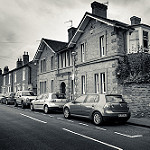

In [18]:
from IPython.display import Image 
Image(filename='data/train/13664.jpg')

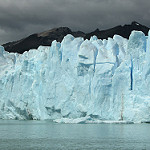

In [19]:
from IPython.display import Image 
Image(filename='data/train/11432.jpg')

In [20]:
os.listdir('data/')

['test.csv', 'train', 'test']

###Loading and Understanding the Data
The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data, means **understanding how the data directories are structured**, what the **labels** are and what some **sample images** look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, **6 labels** are stored based on the csv files.

Fortunately, the fastai library has a handy function made exactly for this.

[Image data from CSV / DataFrame](https://docs.fast.ai/vision.data.html#ImageDataBunch.from_csv).

##Loading Labels [From_CSV](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L131)

from_csv[source]

from_csv(`path`:PathOrStr, `folder`:PathOrStr=`'.'`, `sep`=`None`, `csv_labels`:PathOrStr=`'labels.csv'`, `valid_pct`:float=`0.2`, `fn_col`:int=`0`, `label_col`:int=`1`, `suffix`:str=`''`, `header`:Union[int, str, NoneType]=`'infer'`, `kwargs`:Any) → ImageDataBunch

Create from a csv file in path/csv_labels.

**data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=24);**




**File Structure**

path\

    labels.csv -> label for training images
    test.csv -> list of test images without labels
    
    train\
      training images
    test\
       testing images
      
 train.csv contains correct labels of **17034 images** in train 
 
 test.csv contains list of **7301 images** in train folder itself but without labels.


In [0]:
tfms = get_transforms()
data = ImageDataBunch.from_csv(path_img, ds_tfms=tfms, size=300)
#data = ImageDataBunch.from_csv(path, train='train','../labels.csv', valid_pct=0.2, ds_tfms=tfms, size=224,classes=[str(i) for i in range(6)])

In [22]:
label_df = pd.read_csv('data/train/labels.csv')
label_df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [23]:
print(data.classes)
len(data.classes),data.c

[0, 1, 2, 3, 4, 5]


(6, 6)

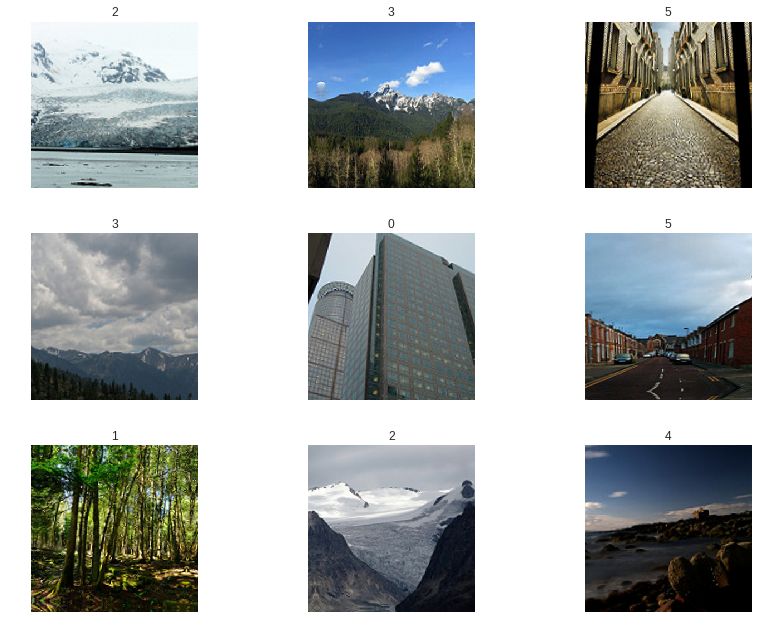

In [24]:
data.show_batch(rows=3, figsize=(12,9))

# Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
#For Metrics to have Top 3 results
from fastai import *
from sklearn import metrics as skm

In [26]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:04<00:00, 23625188.90it/s]


epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


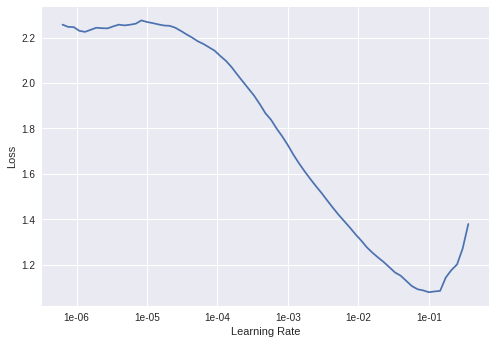

In [0]:
learn.lr_find()
learn.recorder.plot()

##Train and save the model checkpoint

In [0]:
#Run this when training
learn.fit_one_cycle(5) ## best way to fit as of 2018
print("learning complete")

epoch,train_loss,valid_loss,accuracy
1,0.352410,0.216003,0.918086


In [0]:
print("we save after 1st weights are learned")
learn.save('stage-1-550')


Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('stage-2-9495')
#learn.load('stage-2-9495')

print("we save after 2nd weights are learned")

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

If it doesn't, you can always go back to your previous model.

In [0]:
learn.save('stage-3-9527')
#learn.load('stage-3-9527')

print("we save after unfreezing 3rd weights are learned")

In [0]:
print("weights loaded")
#Load the pre-trained model weights
#!mv stage-3-9527.pth data/train/models/stage-3-9527.pth
#!mv stage-2-550.pth data/train/models/stage-2-550.pth
learn.load('stage-3-9527')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

The categories of natural scenes and their corresponding labels in the dataset are as follows -

**'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5**

## New Section

**interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability**

In [0]:
interp.plot_top_losses(9, figsize=(15,11)) # Prediction/ Actual/ Loss/ Probability
'''
The categories of natural scenes and their corresponding labels in the dataset are as follows -
'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5'''

In [0]:
interp.most_confused()

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)



```
# This is formatted as code
```



---



## Add the Test Folder

In [0]:
# now replace the validation dataset entry with the test dataset as a new validation dataset: 
# everything is exactly the same, except replacing `split_by_pct` w/ `split_by_folder` 
# (or perhaps you were already using the latter, so simply switch to valid='test')
data_test = (ImageItemList.from_csv(path_img,csv_name='labels.csv')
        .split_by_folder(train='train', valid='../test')
        .label_from_csv()
        .transform(tfms)
        .databunch()
        .normalize()
       ) 
learn.data = data_test
learn.validate()

In [0]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=tfms, size=300)


###Start the Prediction for the Test Dataset based on test csv

In [0]:
#test_files = os.listdir('data/test')
#test_df = pd.read_csv(f'{path}test.csv')
#print("test files are") 
#test_files
#test_file_name = pd.DataFrame(test_files)
print(test_file_name.nunique())


In [0]:
#demo = []
  img = learn.data.test_ds[0][0]
  a = learn.predict(img)
  b = list(a)[2]
  print(a)
  c = pd.DataFrame([[i, b[i]] for i in range(len(b))])
  c.columns = ["class","probability"]
  #print(c)
  d = c.sort_values("probability", ascending = False)
  #demo.append(d[:3])
  #d = sorted(c, reverse = True)
  print(d[:3])

#??learn.predict

In [0]:
preds,_ = learn.get_preds(DatasetType.Test);

In [0]:
pred,y = learn.TTA(DatasetType.Test);

In [0]:
# Predict into the test set
learn.get_preds(DatasetType.Test)
test_output = learn.get_preds(is_test=True)
log_probs, y = test_output

In [0]:
DatasetType.Test[0]

In [0]:
test_ids = list(sorted({fname.split('_')[0] for fname in os.listdir(path/'test')}))

data.test_ds.x

test.
#pred_labels = [' '.join(list([str(i) for i in np.nonzero(row>0.2)[0]])) for row in np.array(preds)];pred_labels
#df = pd.DataFrame({'Id':test_ids,'Predicted':pred_labels})
#df.to_csv(path/'protein_predictions_datablocks.csv', header=True, index=False)

In [0]:
preds.info()


In [0]:
predsnp = np.array(preds)
predsdf = pd.DataFrame(predsnp)

In [0]:
predsdf

In [0]:
predsdf.to_csv("preds.csv")